<a href="https://colab.research.google.com/github/VoTanThinh/XULYANH/blob/main/FLOWERS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import keras
from keras.preprocessing.image import ImageDataGenerator
train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_data= ImageDataGenerator(rescale = 1./255)
training_set=train_data.flow_from_directory('/content/drive/MyDrive/AI/FLOWER/TRAIN',target_size=(200,200), batch_size=32, class_mode='categorical')
test_set=test_data.flow_from_directory('/content/drive/MyDrive/AI/FLOWER/VALDIATION',target_size=(200,200 ), batch_size=32, class_mode='categorical')
training_set.class_indices
test_set.class_indices

Found 3329 images belonging to 6 classes.
Found 198 images belonging to 6 classes.


{'apricot': 0,
 'common_daisy': 1,
 'lotus': 2,
 'pink': 3,
 'rose': 4,
 'water_lily': 5}

In [7]:
#tạo mô hình CNN sủ dụng tuần tự
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout,Flatten,Conv2D, MaxPooling2D, Normalization         #dense :full conected ANN
from keras.layers import LeakyReLU
from keras.optimizers import Adam
model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3),activation = 'linear',input_shape=(200,200,3),padding = 'same'))                                                          #32 lần tích chập đầu tiên
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))

model.add(Conv2D(64,(3,3),activation = 'linear',padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))

model.add(Conv2D(128,(3,3),activation = 'linear',padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))

model.add(Conv2D(256,(3,3),activation = 'linear',padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))




#ANN
model.add(Flatten())   # flatten làm phẳng ảnh
model.add(Dense(512,activation = 'linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(6,activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 200, 200, 32)      896       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 200, 200, 32)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 100, 100, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 100, 100, 64)      0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                  

In [8]:
# Biên dịch 
model.compile(loss ='categorical_crossentropy', optimizer='Adam',  metrics = ['accuracy'])   # Adam tốc độ học 0.1
train = model.fit(training_set, epochs=20, batch_size=128 ,verbose=1)
test_loss,test_acc = model.evaluate(training_set)
print('độ chính xác trên tập kiểm tra', test_acc) 
print('hàm mất mát trên tập kiểm ta', test_loss) 

Epoch 1/20
105/105 [==============================] - 79s 724ms/step - loss: 1.1734 - accuracy: 0.5834
Epoch 2/20
105/105 [==============================] - 51s 487ms/step - loss: 0.8189 - accuracy: 0.7029
Epoch 3/20
105/105 [==============================] - 52s 493ms/step - loss: 0.7514 - accuracy: 0.7348
Epoch 4/20
105/105 [==============================] - 51s 482ms/step - loss: 0.6198 - accuracy: 0.7840
Epoch 5/20
105/105 [==============================] - 51s 484ms/step - loss: 0.5556 - accuracy: 0.8099
Epoch 6/20
105/105 [==============================] - 52s 491ms/step - loss: 0.4175 - accuracy: 0.8600
Epoch 7/20
105/105 [==============================] - 51s 491ms/step - loss: 0.3485 - accuracy: 0.8847
Epoch 8/20
105/105 [==============================] - 51s 481ms/step - loss: 0.4108 - accuracy: 0.8651
Epoch 9/20
105/105 [==============================] - 51s 489ms/step - loss: 0.3643 - accuracy: 0.8786
Epoch 10/20
105/105 [==============================] - 51s 489ms/step - l

In [9]:
#Lưu
from keras.models import load_model
model.save("Flowers.h5")
model_1=load_model('Flowers.h5')

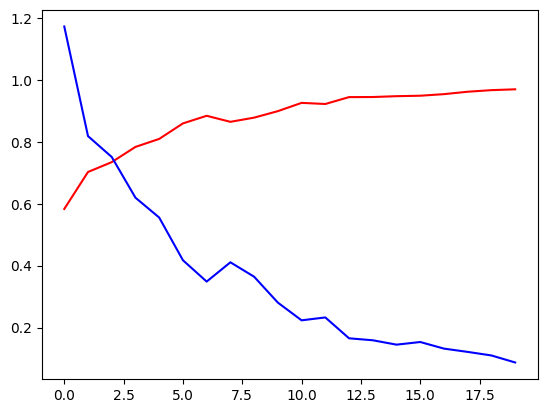

In [10]:
import matplotlib.pyplot as plt      
accuracy = train.history['accuracy']
loss = train.history['loss']                           # VẼ ĐỒ THỊ SỬ MẤT MÁT VÀ ĐỘ HỌC TẬP CHÍNH XÁC CỦA BÀI KIỂM TRA
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,'r',label = 'Training accuracy')
plt.plot(epochs,loss,'b',label = 'Training loss')
plt.show()

1/1 [==============================] - 0s 20ms/step
Hoa daisy


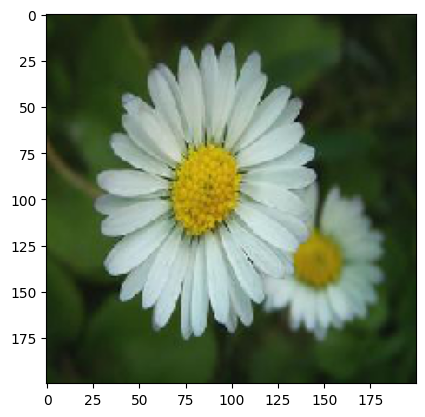

1/1 [==============================] - 0s 21ms/step
Hoa daisy


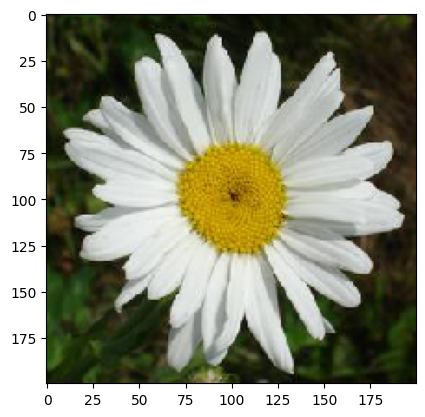

1/1 [==============================] - 0s 22ms/step
Hoa water_lily


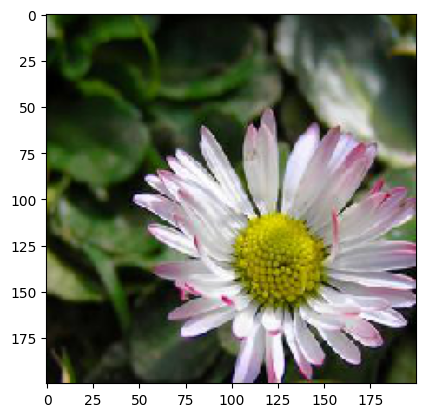

1/1 [==============================] - 0s 25ms/step
Hoa rose


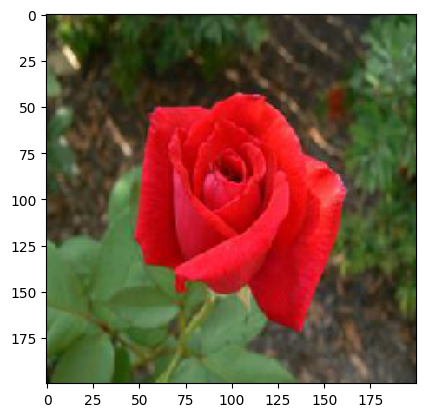

1/1 [==============================] - 0s 23ms/step
Hoa rose


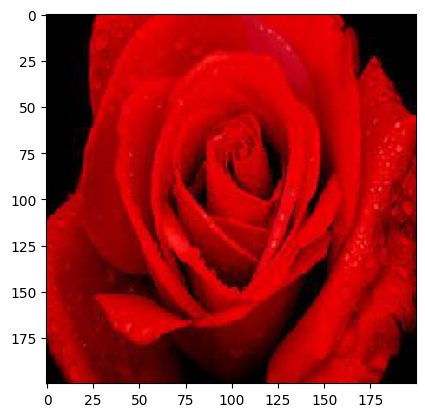

1/1 [==============================] - 0s 18ms/step
Hoa rose


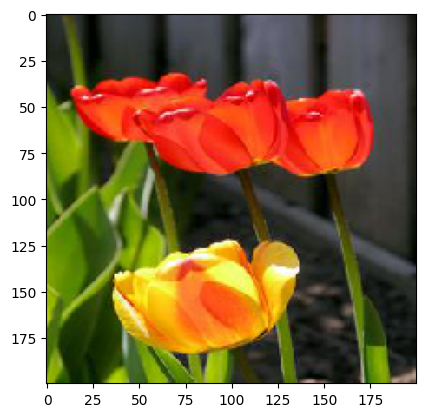

1/1 [==============================] - 0s 30ms/step
Hoa lotus


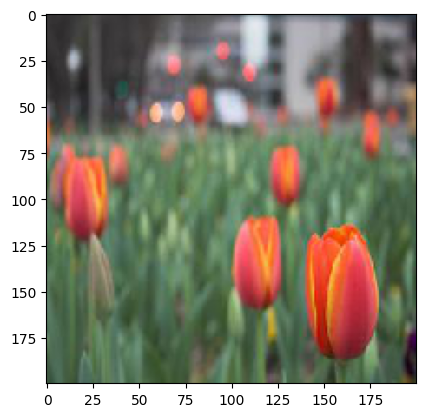

1/1 [==============================] - 0s 39ms/step
Hoa water_lily


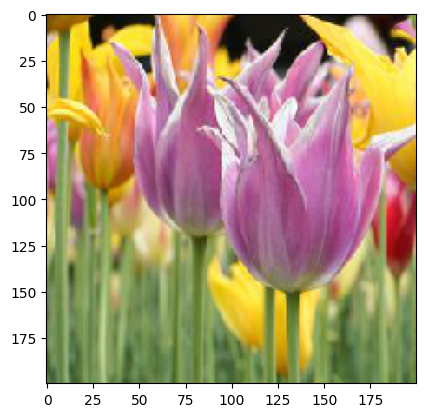

1/1 [==============================] - 0s 19ms/step
Hoa water_lily


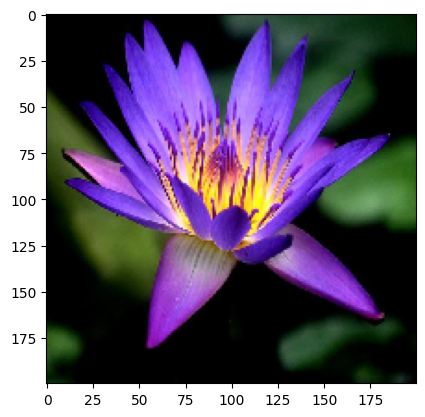

1/1 [==============================] - 0s 33ms/step
Hoa water_lily


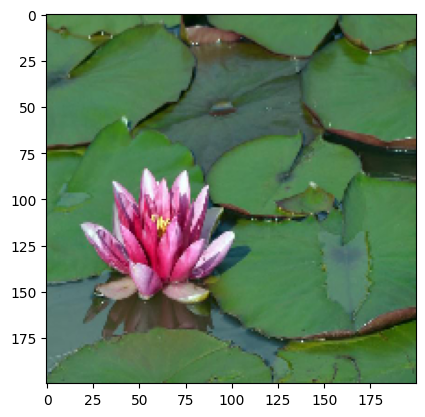

1/1 [==============================] - 0s 26ms/step
Hoa rose


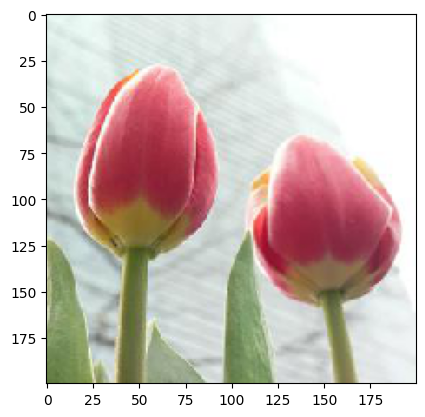

1/1 [==============================] - 0s 39ms/step
Hoa water_lily


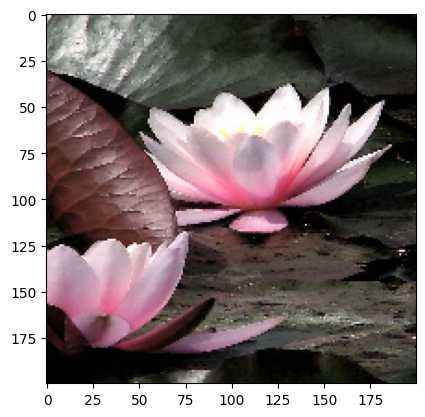

1/1 [==============================] - 0s 38ms/step
Hoa lotus


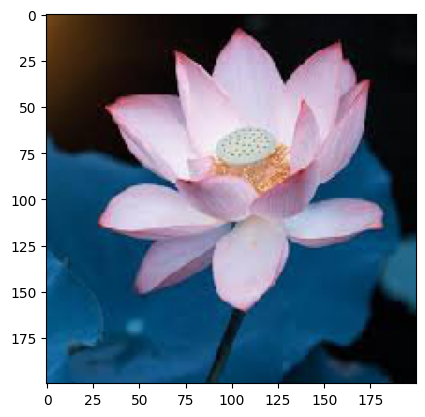

1/1 [==============================] - 0s 39ms/step
Hoa lotus


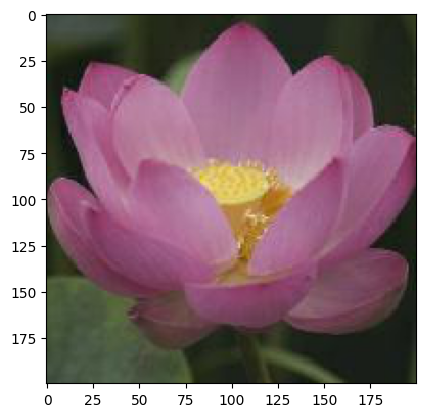

1/1 [==============================] - 0s 46ms/step
Hoa lotus


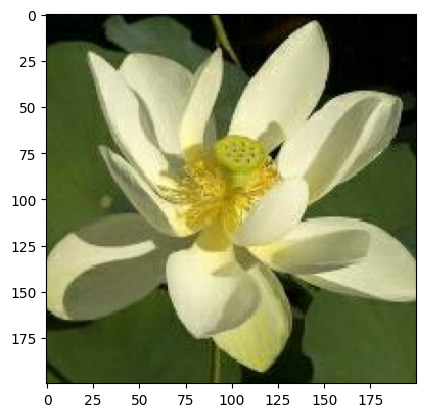

1/1 [==============================] - 0s 34ms/step
Hoa apricot


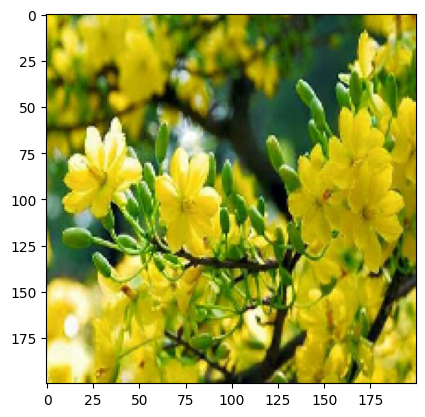

1/1 [==============================] - 0s 38ms/step
Hoa apricot


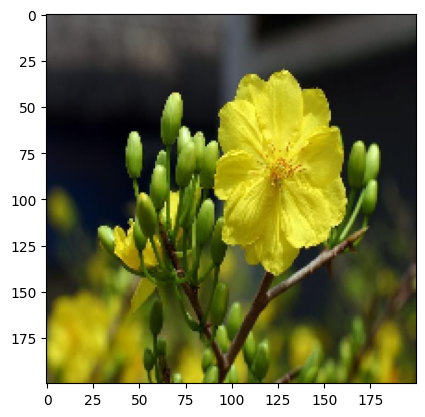

1/1 [==============================] - 0s 65ms/step
Hoa water_lily


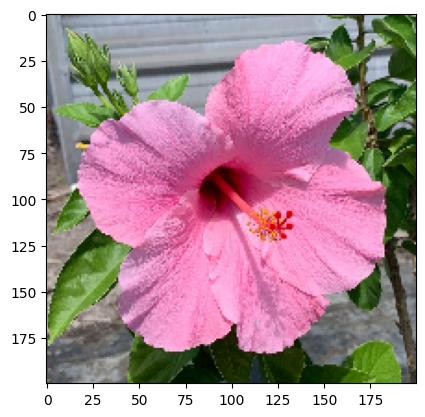

1/1 [==============================] - 0s 60ms/step
Hoa pink


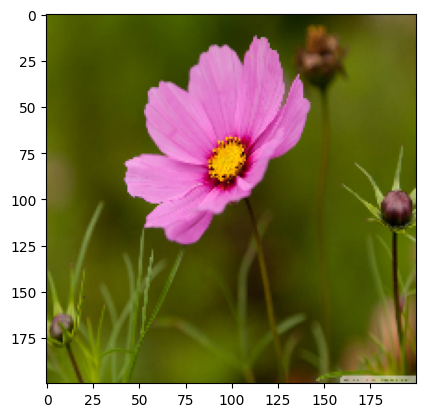

1/1 [==============================] - 0s 31ms/step
Hoa pink


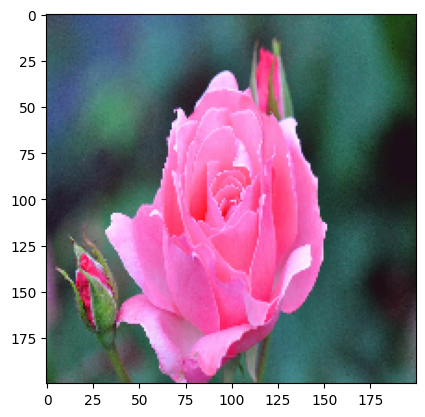

1/1 [==============================] - 0s 30ms/step
Hoa pink


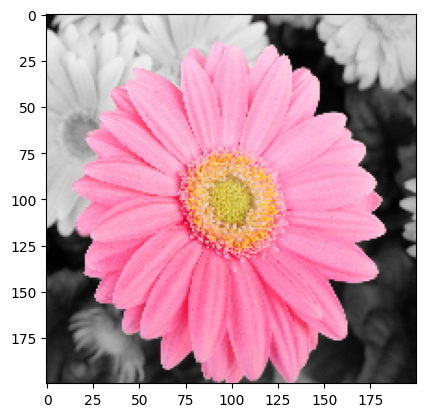

In [14]:
from keras.models import load_model
from keras.utils import load_img, img_to_array
import os
import numpy as np 
test='/content/drive/MyDrive/AI/FLOWER/TEST'
for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(200,200))
  plt.imshow(img)
  img=img_to_array(img) 
  img=img.astype('float32') 
  img=img/255 
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax()) 
  class_name=['Hoa apricot','Hoa daisy','Hoa lotus','Hoa pink','Hoa rose', 'Hoa water_lily']
  print(class_name[result]) 
  plt.show()